In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerize import numerize
import missingno as mso # missging values visualization
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Time
import time

# Stats
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Warnings
import warnings
warnings.filterwarnings("ignore")


from zipfile import ZipFile
import zipfile

In [3]:
#Zipping File

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('D:\\vscode\\Fortnite-Statistic')

In [4]:
df=pd.read_csv(r'D:\vscode\Fortnite-Statistic\Fortnite Statistics.csv')

In [5]:
df.head()

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070


In [6]:
print("==="*25)
print("Data Information")
print("==="*25)
print(df.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  87 non-null     object 
 1   Time of Day           87 non-null     object 
 2   Placed                87 non-null     int64  
 3   Mental State          87 non-null     object 
 4   Eliminations          87 non-null     int64  
 5   Assists               87 non-null     int64  
 6   Revives               87 non-null     int64  
 7   Accuracy              87 non-null     object 
 8   Hits                  87 non-null     int64  
 9   Head Shots            87 non-null     int64  
 10  Distance Traveled     87 non-null     float64
 11  Materials Gathered    87 non-null     int64  
 12  Materials Used        87 non-null     int64  
 13  Damage Taken          87 non-null     int64  
 14  Damage to Players     87 non-null     int64  
 15  Damage t

*We have to convert few columns into their original Dtypes*

In [7]:
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(df.isnull().sum())

Checking Data has null values or not
Date                    0
Time of Day             0
Placed                  0
Mental State            0
Eliminations            0
Assists                 0
Revives                 0
Accuracy                0
Hits                    0
Head Shots              0
Distance Traveled       0
Materials Gathered      0
Materials Used          0
Damage Taken            0
Damage to Players       0
Damage to Structures    0
dtype: int64


*Data don't have null Values*

In [8]:
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 87 rows & 16 Columns
************************************************************


In [9]:
number=df.select_dtypes(include=np.number)
category=df.select_dtypes(include=object)

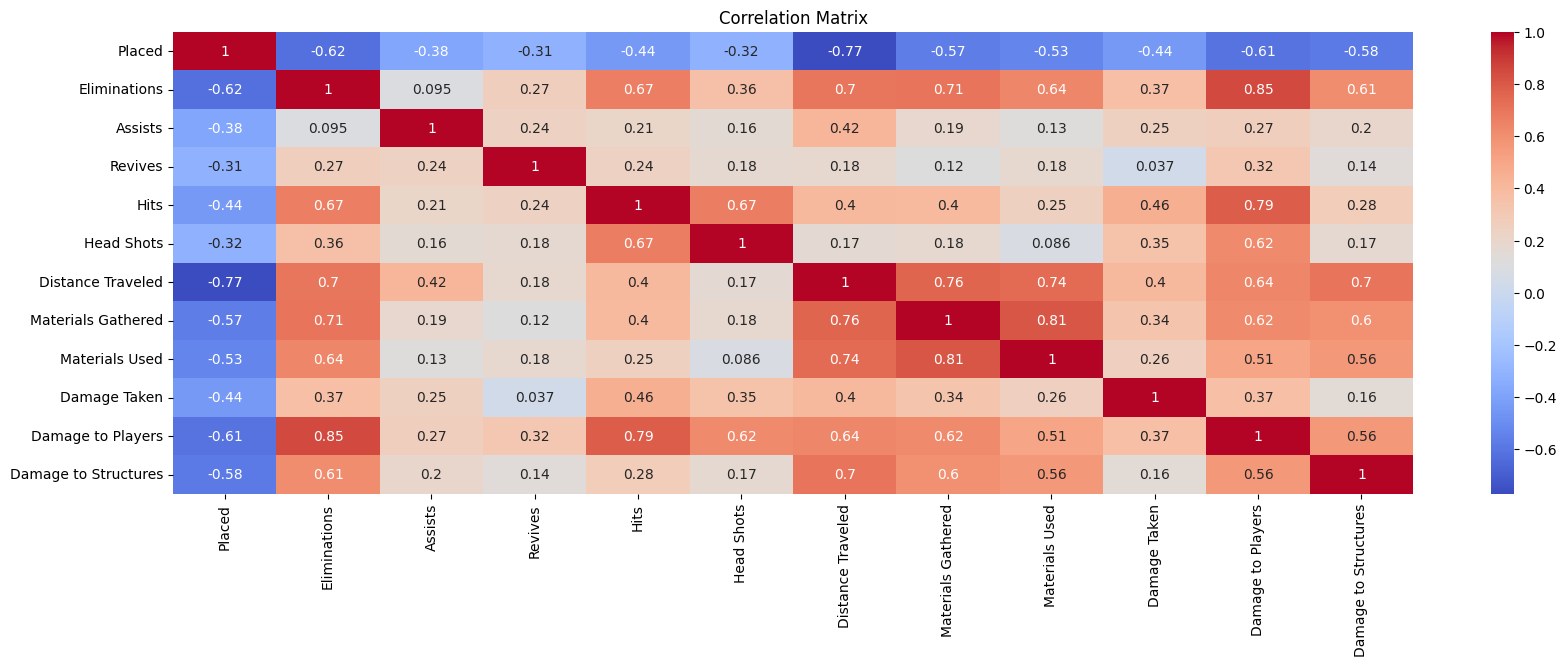

In [10]:
# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
#Descriptive Stats
number.describe().T

,count,mean,std,min,25%,50%,75%,max
Placed,87.0,22.045977,13.145791,1.00,15.00,21.00,28.5,66.0
Eliminations,87.0,2.517241,1.885453,0.00,1.00,2.00,3.0,8.0
Assists,87.0,1.482759,1.388173,0.00,0.00,1.00,2.0,6.0
Revives,87.0,0.402299,0.738631,0.00,0.00,0.00,1.0,4.0
Hits,87.0,29.735632,22.093596,1.00,12.00,27.00,38.0,105.0
Head Shots,87.0,4.747126,5.777298,0.00,1.00,3.00,6.5,33.0
Distance Traveled,87.0,1137.146322,1110.843642,17.86,398.28,638.17,1575.0,4460.0
Materials Gathered,87.0,386.574713,569.978062,0.00,75.00,164.00,418.5,3002.0
Materials Used,87.0,122.712644,225.170370,0.00,20.00,50.00,145.0,1740.0
Damage Taken,87.0,244.172414,124.937399,19.00,154.00,209.00,316.5,677.0


In [12]:
category.describe().T

,count,unique,top,freq
Date,87,7,4/14,24
Time of Day,87,13,2:00 PM,18
Mental State,87,2,sober,45
Accuracy,87,38,25%,6


*Distribution of numerical variables*

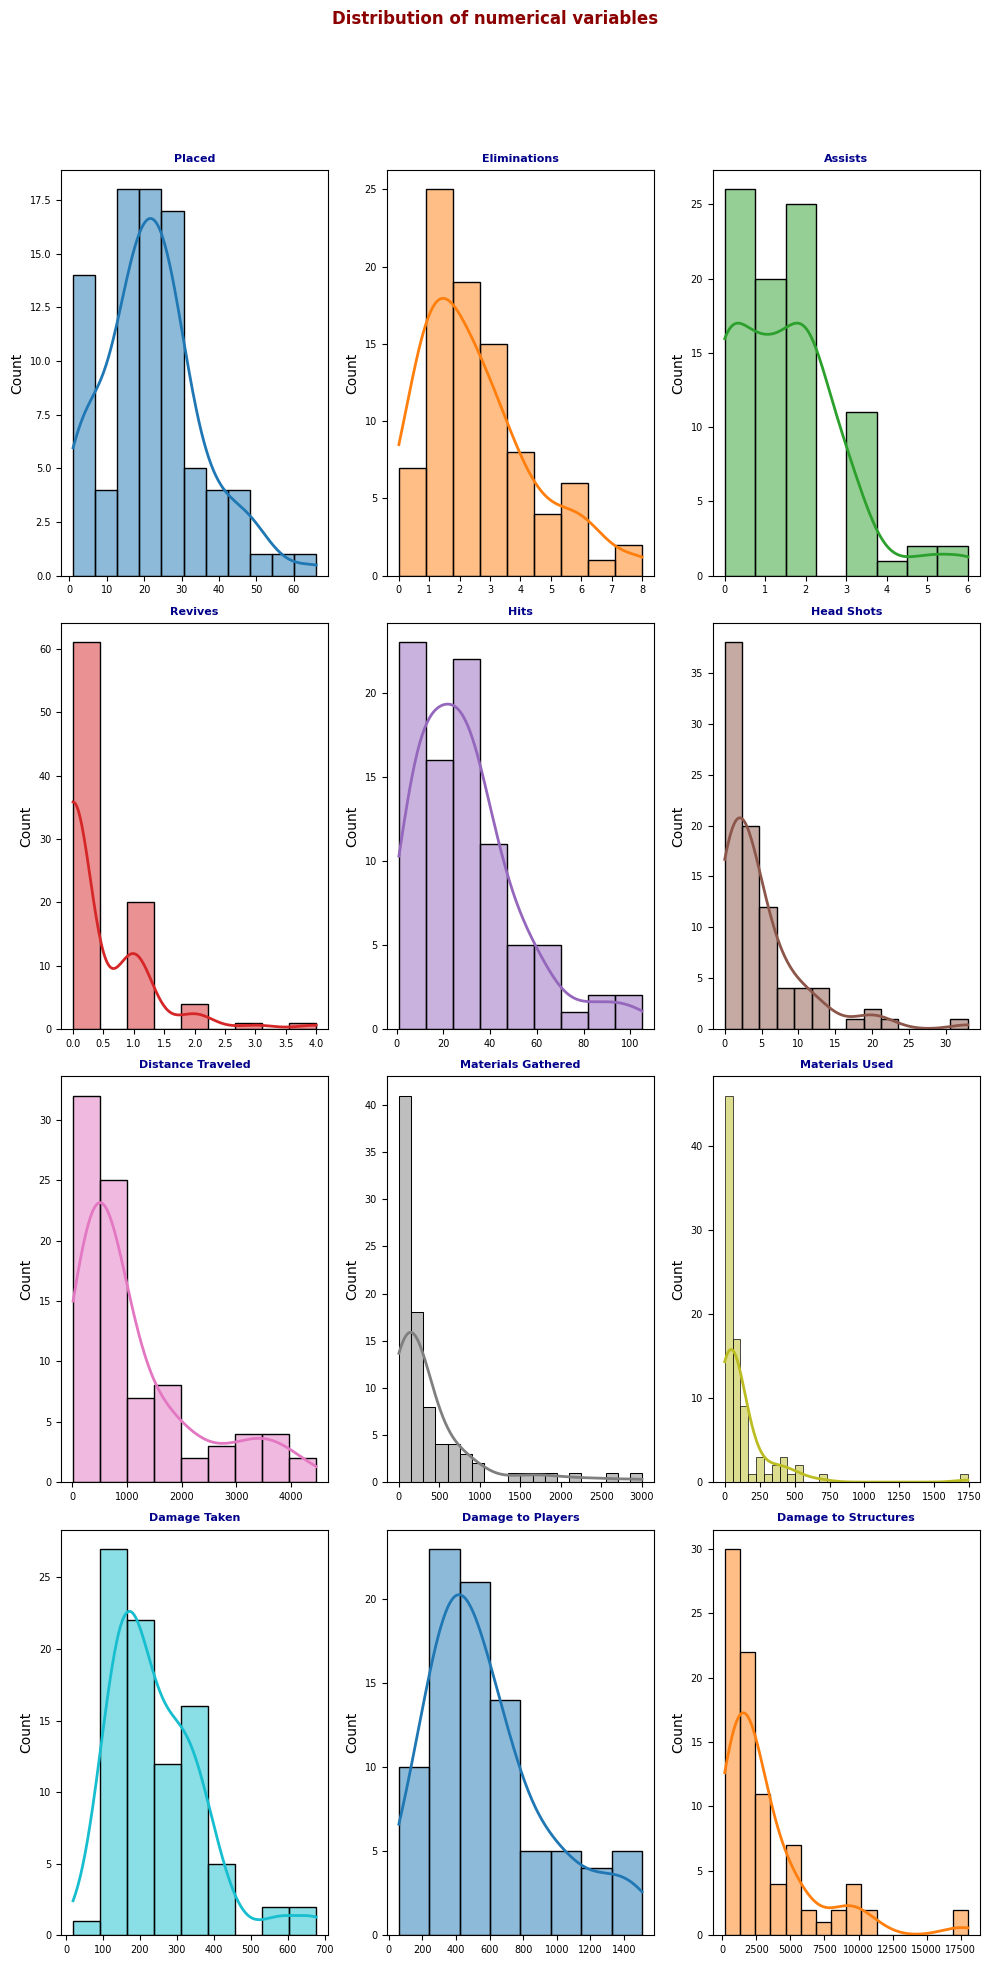

In [13]:
fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (10, 20))
axes = axes.flat


for i,col in enumerate(number):
    sns.histplot(
        number,
        x=col,
        kde=True,
        line_kws={"linewidth":2.0},
        stat="count",
        color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
        ax = axes[i]
    )

    
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize = 8, fontweight = "bold", color = "darkblue")
    axes[i].tick_params(labelsize = 7)


fig.suptitle("Distribution of numerical variables", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [14]:
# Now let's check your skewness and kurtosis of each numerical variable.
for col in number:
    print(f"{col}:")
    print(f"Skewness = {df[col].skew()}")
    print(f"Kurtosis = {df[col].kurt()}")
    print("=="*20)

Placed:
Skewness = 0.673935059155307
Kurtosis = 0.7917186470199513
Eliminations:
Skewness = 0.9953550437545149
Kurtosis = 0.543100072339505
Assists:
Skewness = 1.0775572363537158
Kurtosis = 1.4784163820375187
Revives:
Skewness = 2.383624025612384
Kurtosis = 7.083217337254652
Hits:
Skewness = 1.2885854008221094
Kurtosis = 1.8339903421823354
Head Shots:
Skewness = 2.3380229684398914
Kurtosis = 6.974454749733823
Distance Traveled:
Skewness = 1.4459119654935442
Kurtosis = 1.0253328913108235
Materials Gathered:
Skewness = 2.7141548769854302
Kurtosis = 7.8217525501371465
Materials Used:
Skewness = 4.826883345511078
Kurtosis = 31.036984140105304
Damage Taken:
Skewness = 1.298383609355495
Kurtosis = 2.268819446533121
Damage to Players:
Skewness = 0.9749150284264689
Kurtosis = 0.35504350646694416
Damage to Structures:
Skewness = 2.261636092202565
Kurtosis = 5.908461283443659


*QQ-plots*

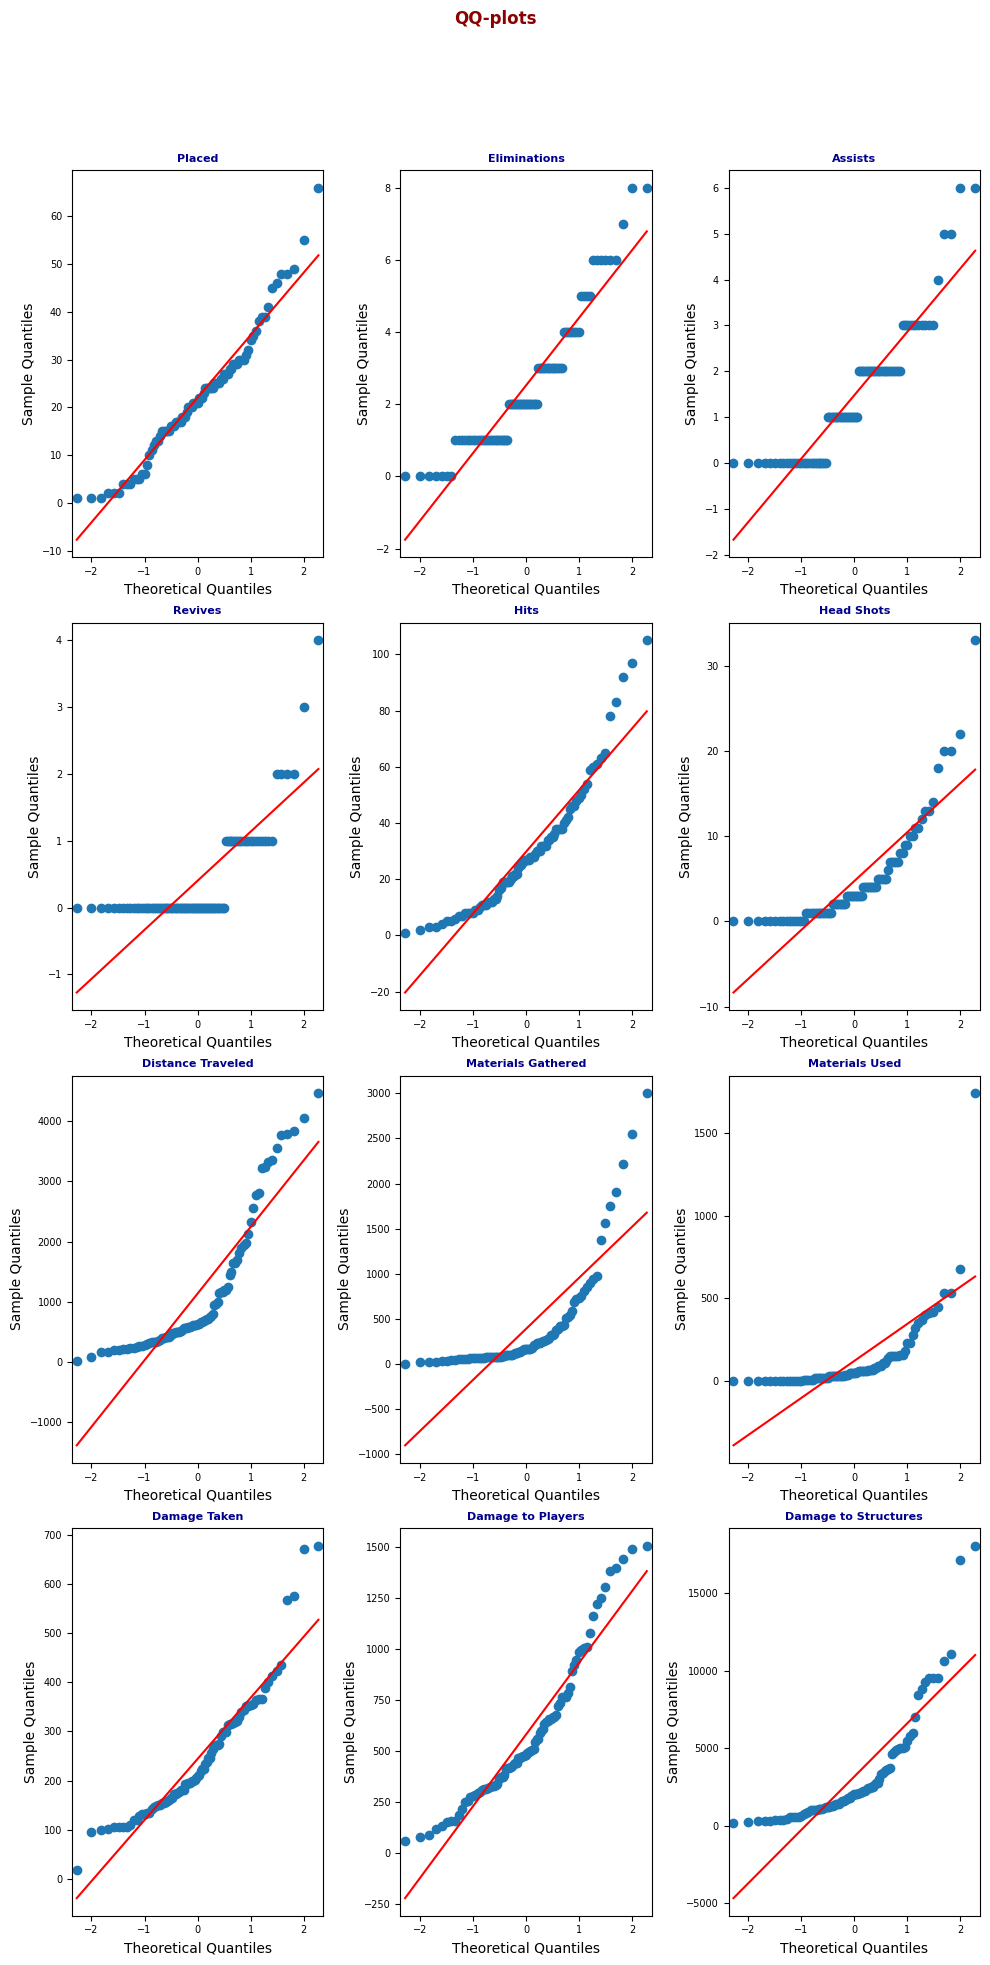

In [15]:
fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (10, 20))
axes = axes.flat

for i,col in enumerate(number):
    qqplot(
        number[col],
        line = "s",
        ax = axes[i]
          )
    

    
    axes[i].set_title(f"{col}", 
                      fontsize = 8, 
                      fontweight = "bold", 
                      color = "darkblue")
    axes[i].tick_params(labelsize = 7)



fig.suptitle("QQ-plots", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

*Box Plot*

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Placed'),
  Text(2, 0, 'Eliminations'),
  Text(3, 0, 'Assists'),
  Text(4, 0, 'Revives'),
  Text(5, 0, 'Hits'),
  Text(6, 0, 'Head Shots'),
  Text(7, 0, 'Distance Traveled'),
  Text(8, 0, 'Materials Gathered'),
  Text(9, 0, 'Materials Used'),
  Text(10, 0, 'Damage Taken'),
  Text(11, 0, 'Damage to Players'),
  Text(12, 0, 'Damage to Structures')])

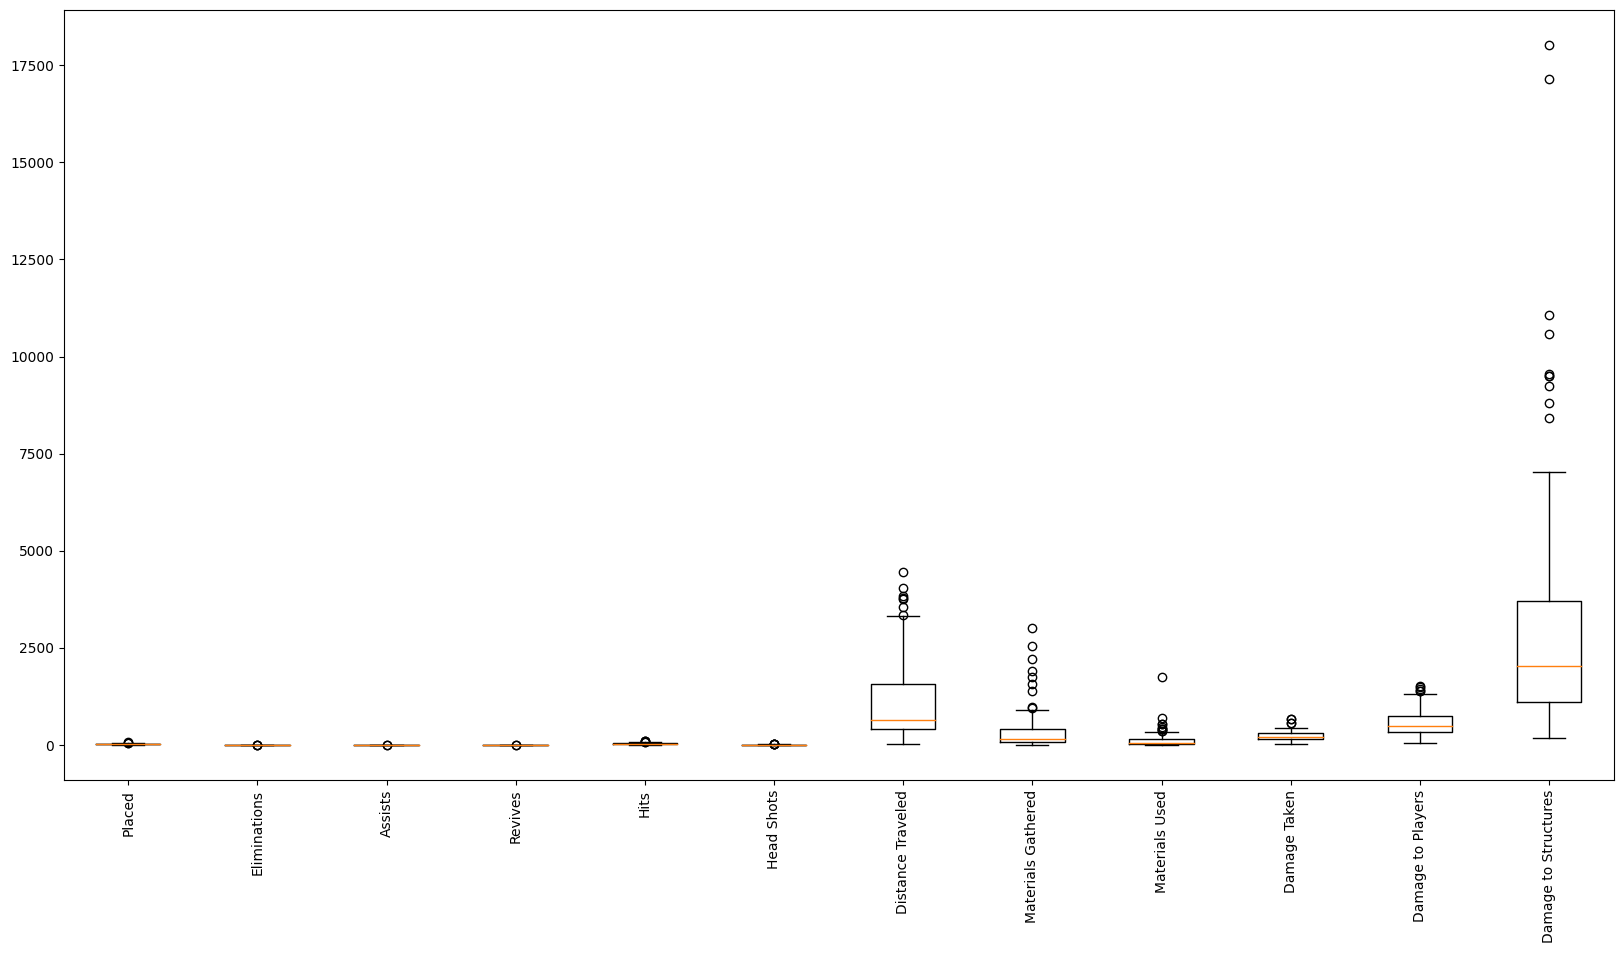

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(number)
ax.set_xticklabels(number.keys())
plt.xticks(rotation=90)

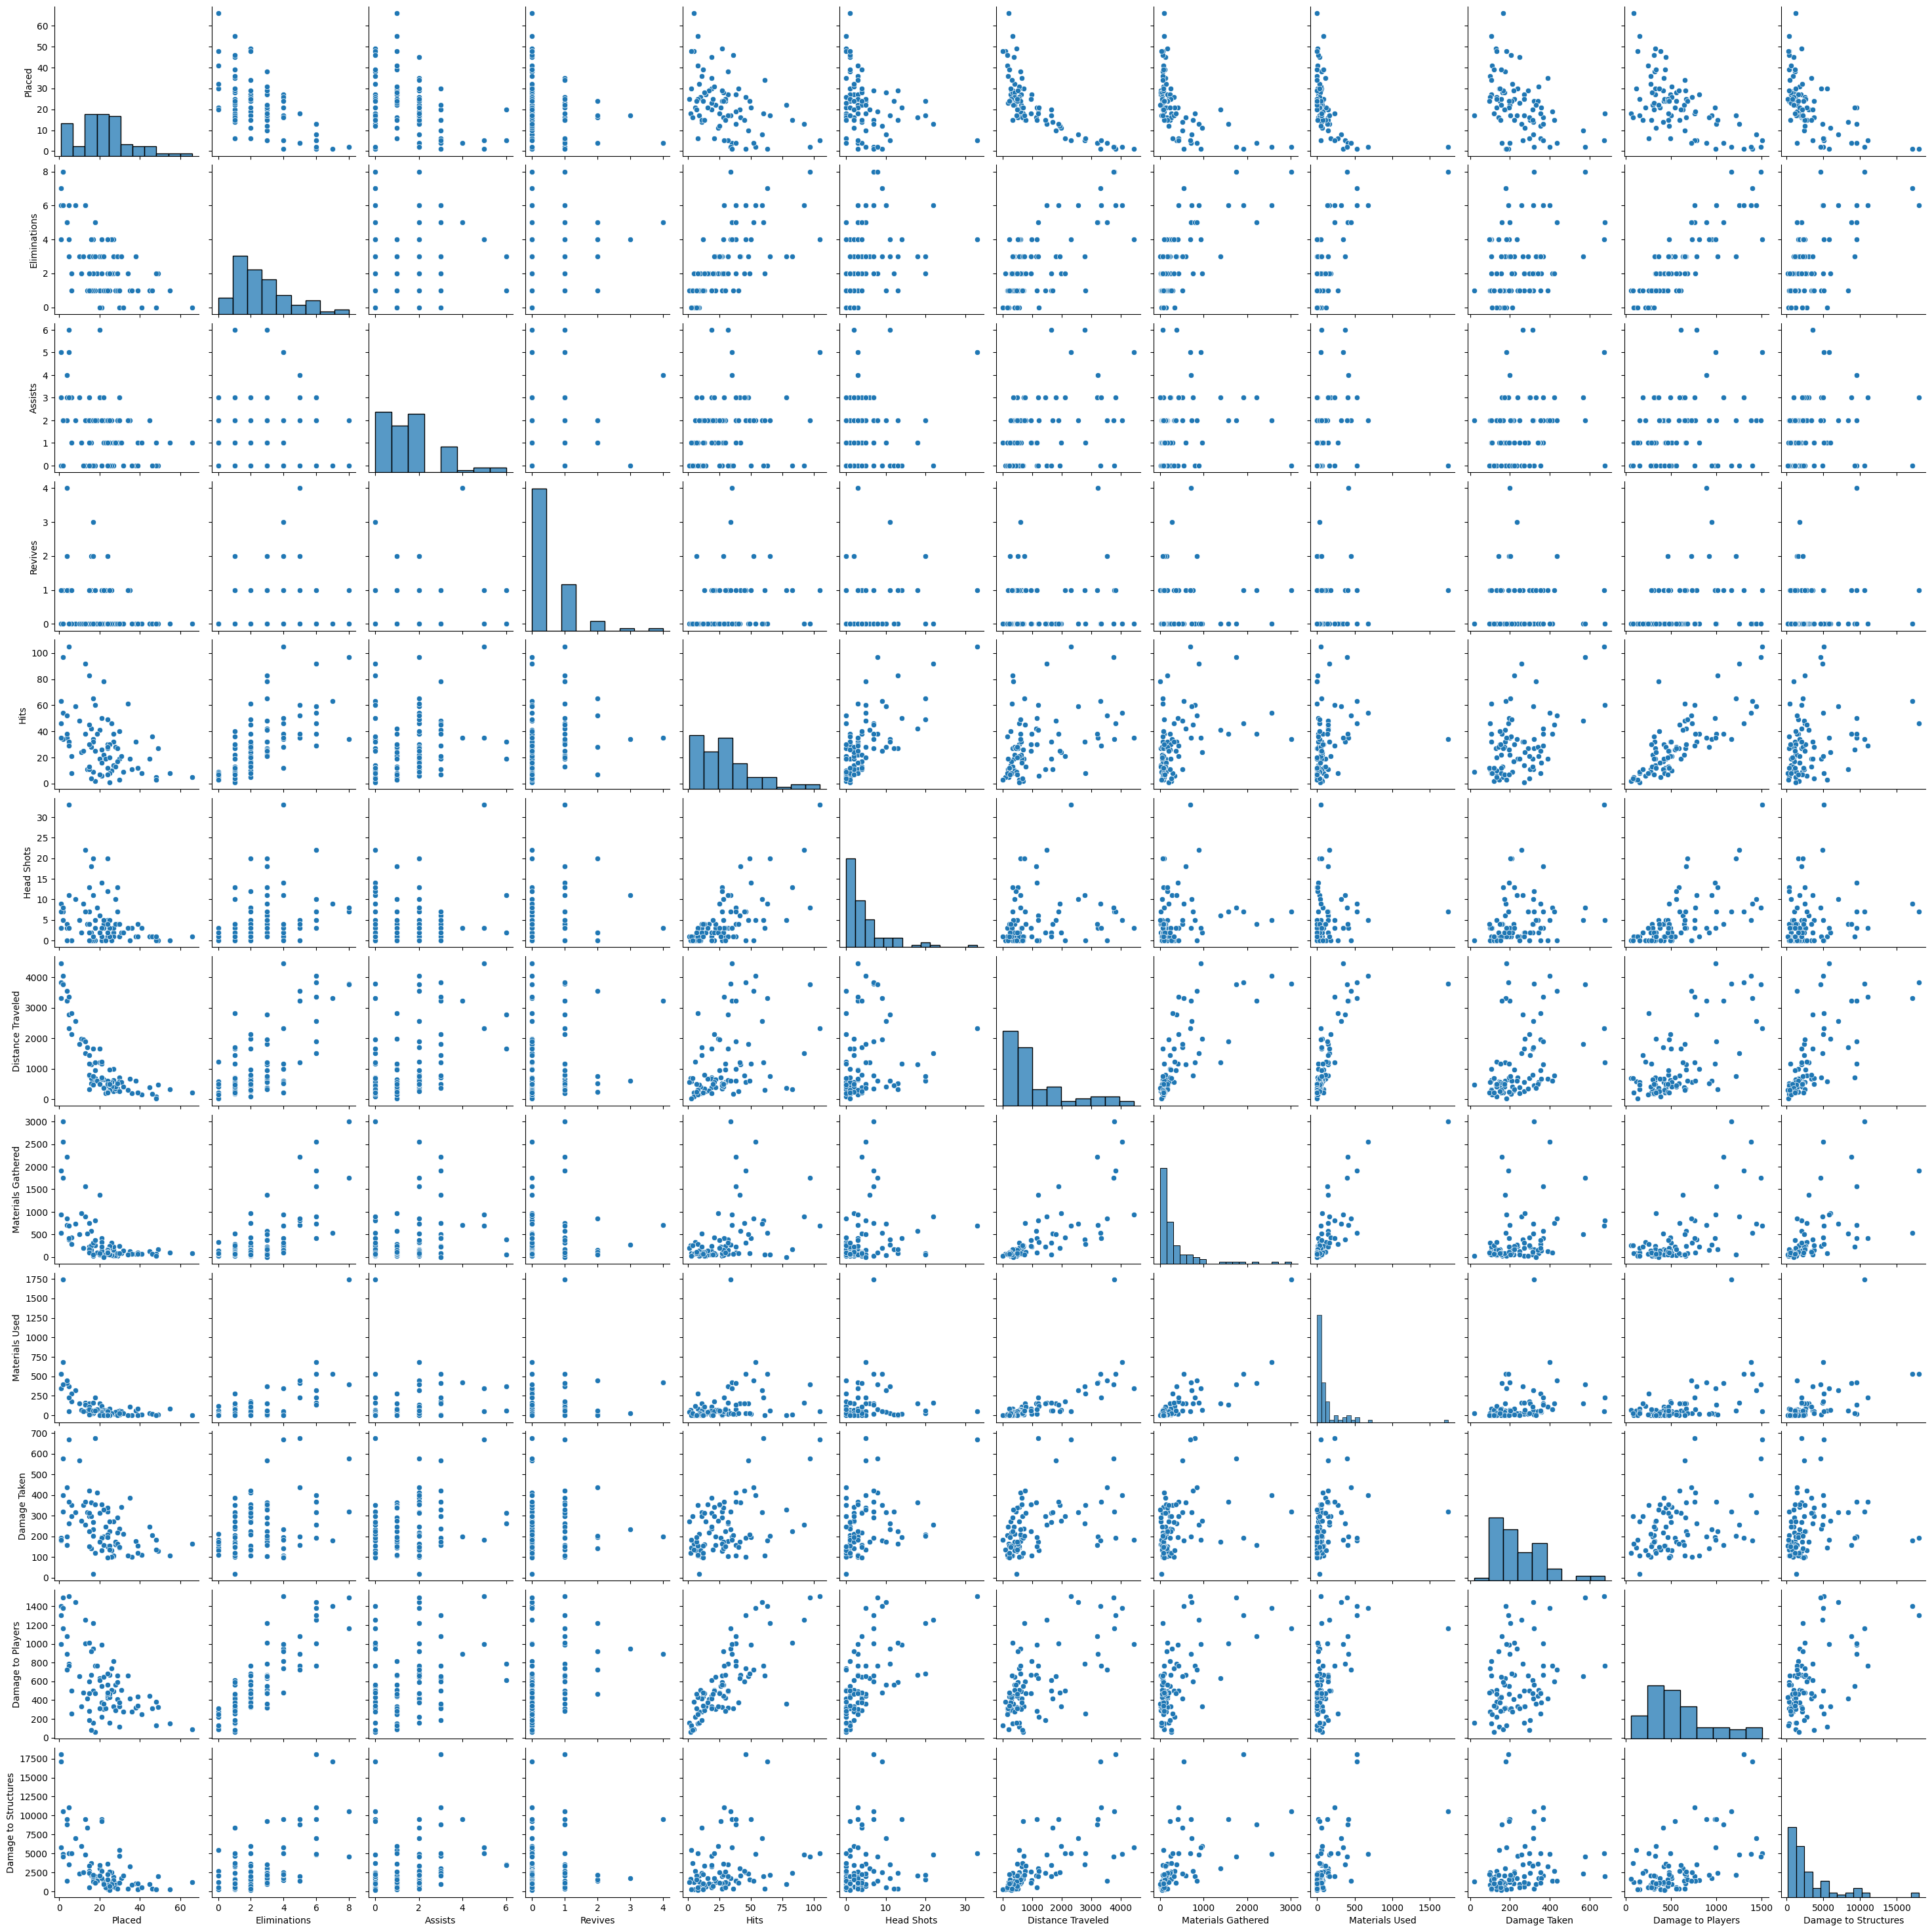

In [17]:
sns.pairplot(number)

In [18]:
category

,Date,Time of Day,Mental State,Accuracy
0,4/10,6:00 PM,sober,23%
1,4/10,6:00 PM,sober,30%
2,4/10,6:00 PM,high,30%
3,4/10,7:00 PM,high,18%
4,4/10,7:00 PM,high,58%
...,...,...,...,...
82,17-Apr,12:00 AM,high,31%
83,17-Apr,12:00 AM,high,20%
84,17-Apr,1:00 PM,sober,28%
85,17-Apr,2:00 PM,sober,26%


In [19]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(x=df['Mental State'],
                 y=df['Placed'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Mental State',
    xaxis_title='Mental State',
    yaxis_title='Placed'
)

plot.show()

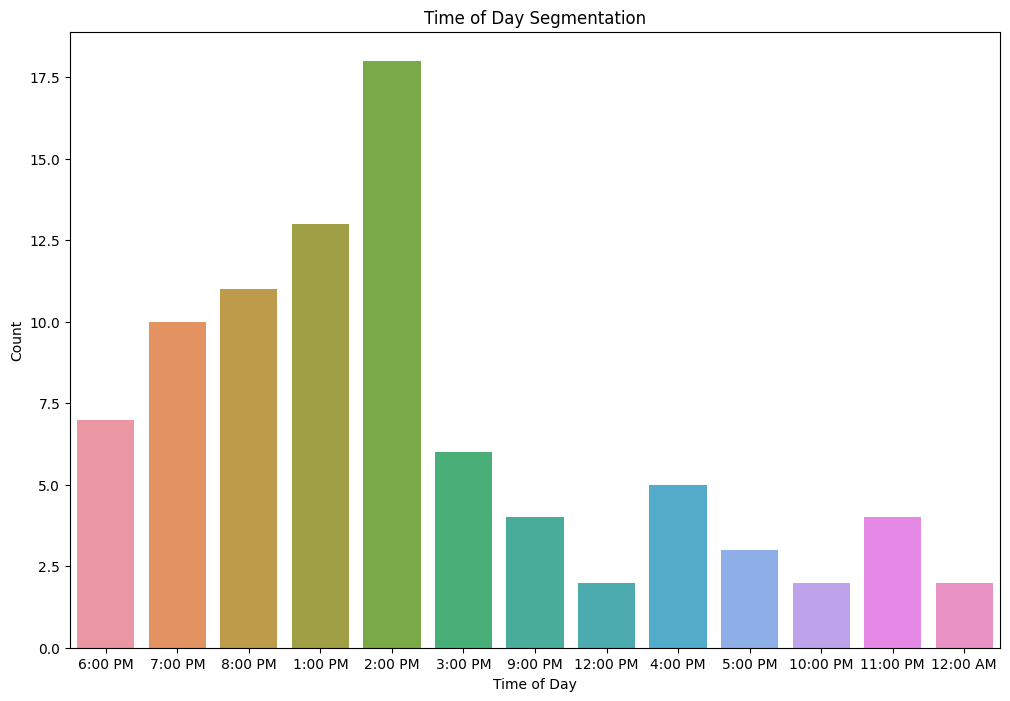

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Time of Day', data=df)
plt.title("Time of Day Segmentation")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

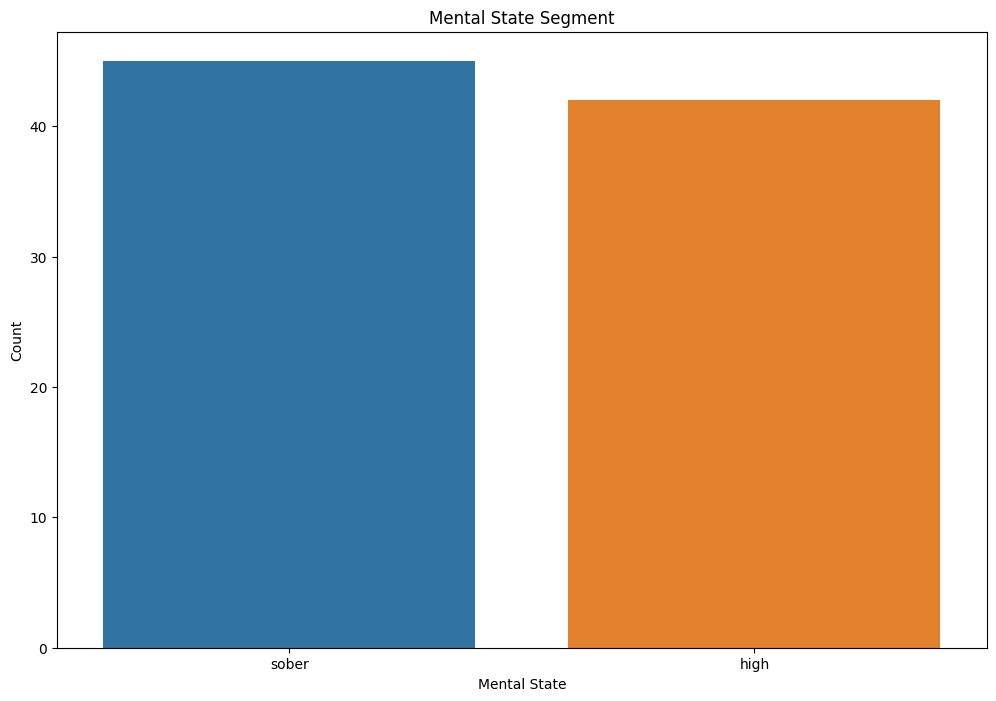

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Mental State', data=df)
plt.title("Mental State Segment")
plt.xlabel("Mental State")
plt.ylabel("Count")
plt.show()

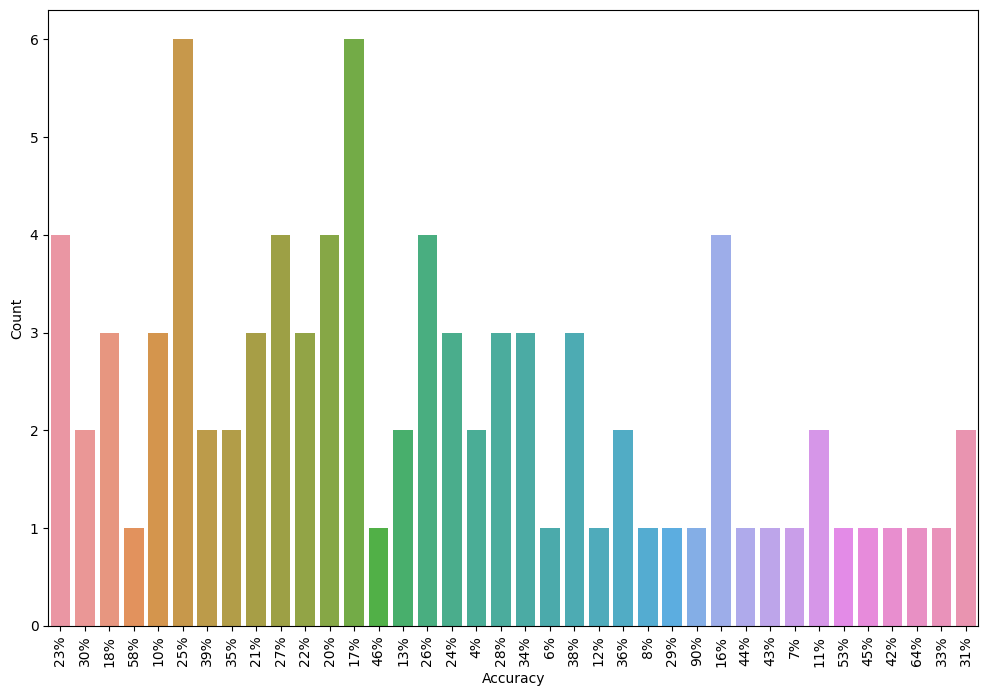

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Accuracy', data=df)
plt.xticks(rotation=90)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.show()

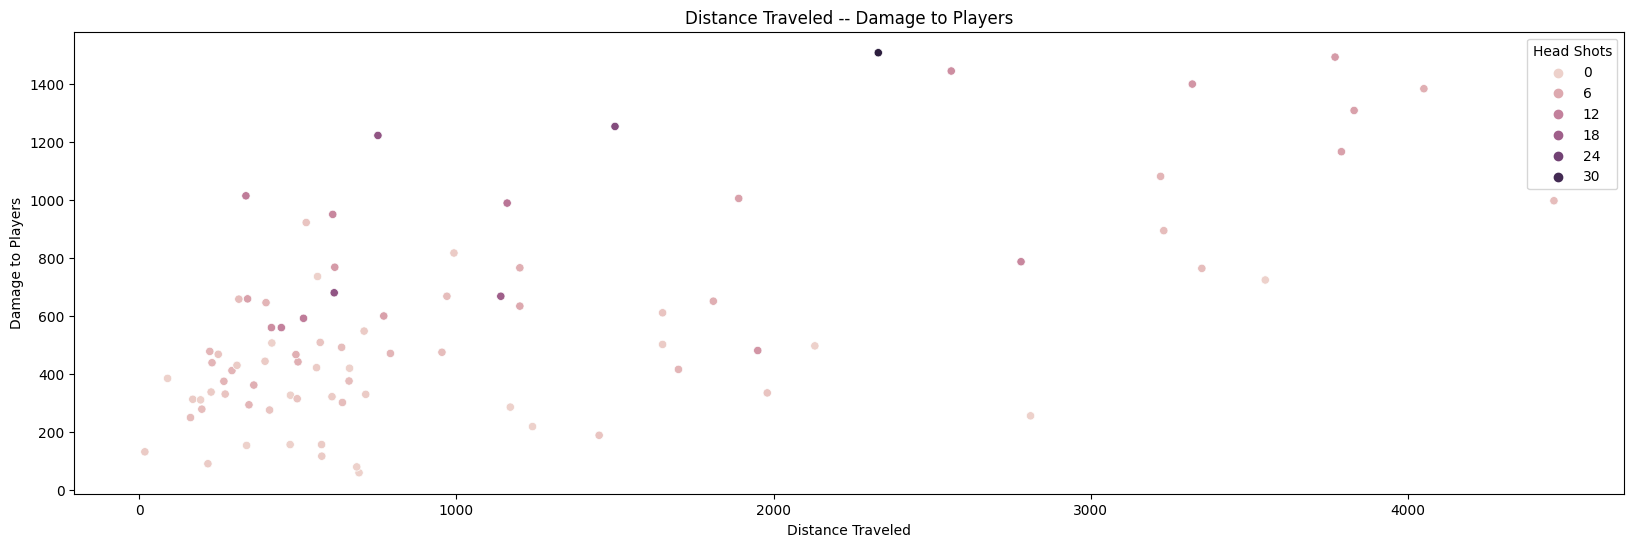

In [36]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=number,x='Distance Traveled',y='Damage to Players',hue="Head Shots")
plt.title("Distance Traveled -- Damage to Players")
plt.show()

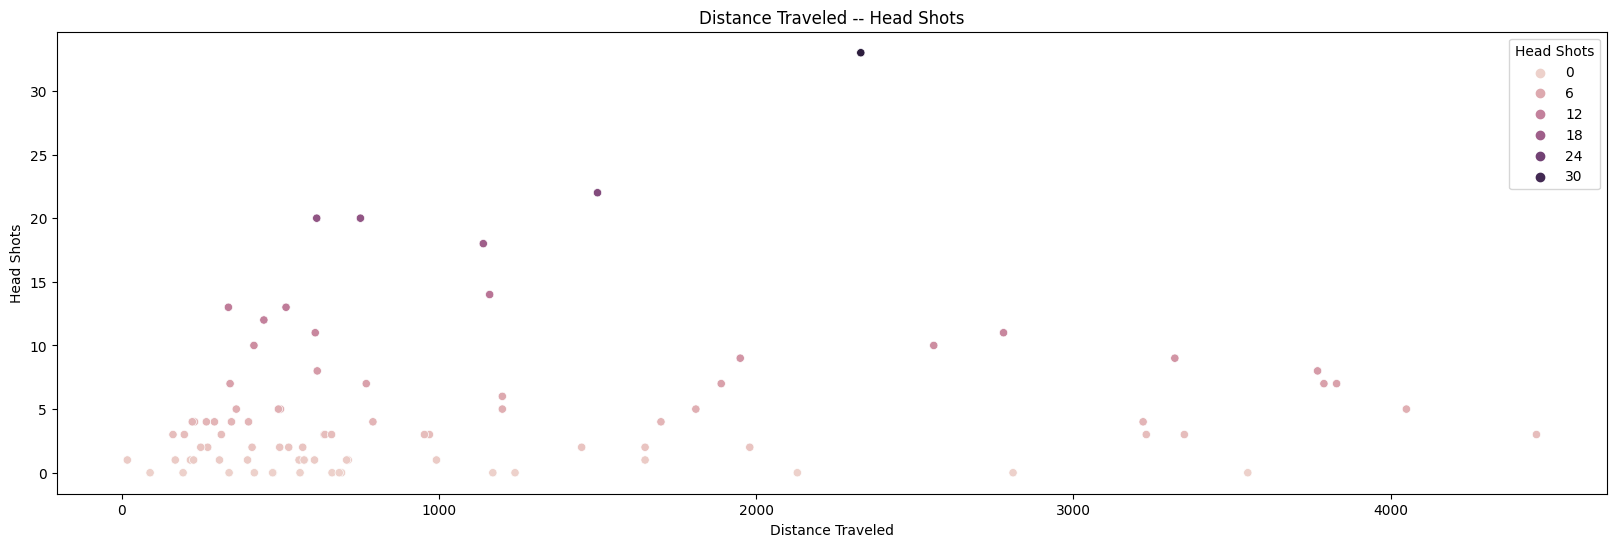

In [35]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=number,x='Distance Traveled',y='Head Shots',hue="Head Shots")
plt.title("Distance Traveled -- Head Shots")
plt.show()

Yet you can try few other combinations

Thank you